In [91]:
import numpy as np

np.random.seed(2344) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
#assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1.5,1.5,1.5])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
#assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


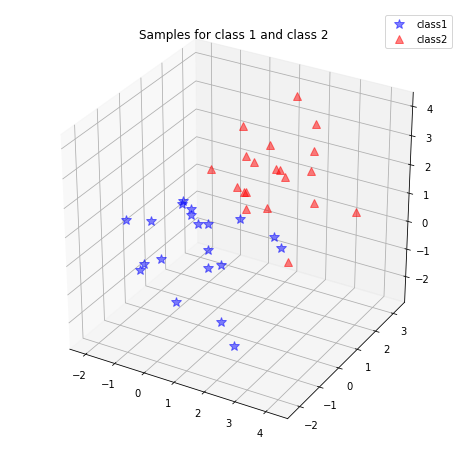

In [92]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], '*', markersize=10, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [93]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [94]:
all_samples

array([[-0.23309942,  1.69836677,  1.33899576,  0.57617456, -0.22596239,
        -0.85030249, -0.03289877,  1.48483121, -0.34894073,  1.60355876,
        -0.99901383, -0.47625643, -0.70050719, -1.31076958, -1.09497555,
        -0.14146171, -2.08710846, -1.01187331,  0.28559213,  1.49412567,
         1.82120252,  1.00587381,  1.66143973,  4.23295684,  1.23046605,
        -0.07438198,  3.82723762,  0.29251001,  0.79826289,  2.76617818,
        -0.21318233,  1.99332985,  0.01519087,  0.85213622,  0.0579606 ,
         1.05226103,  2.00422978,  1.87126868,  2.50291162,  1.80965762],
       [ 0.88506014,  1.68600092, -0.81556578,  0.30129162, -2.20487572,
        -0.98960393,  0.54692928,  1.64187952, -0.15273046, -0.55948782,
         0.70044128, -0.41852482,  0.7181708 , -0.92914753, -0.23171206,
         0.24961476, -0.46817701,  1.95906178, -0.68463094, -0.10776784,
         2.23505386,  0.94473159,  1.41769745,  1.52547179,  2.56002516,
         2.43570213, -1.28489062,  0.27700274,  2.

In [95]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.93009573  0.46901066  0.70120597]
 [ 0.46901066  1.81861858  0.84748962]
 [ 0.70120597  0.84748962  2.29677515]]


In [96]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)


In [97]:
eig_vec_cov

array([[ 0.49333686,  0.8591786 , -0.13576036],
       [ 0.51628107, -0.41483574, -0.74924306],
       [ 0.70005186, -0.29953872,  0.64823141]])

In [98]:
eig_val_cov

array([ 3.41594024,  1.45918   ,  1.17036923])

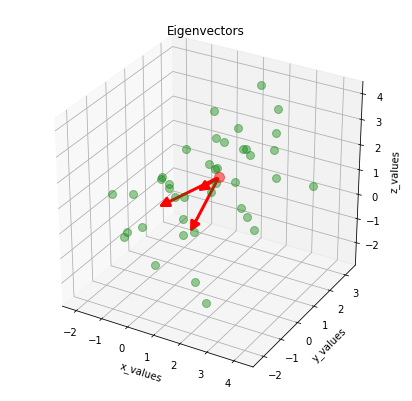

In [99]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.4)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [100]:
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

3.41594023754
1.45918000002
1.17036923235


In [101]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.49333686  0.8591786 ]
 [ 0.51628107 -0.41483574]
 [ 0.70005186 -0.29953872]]


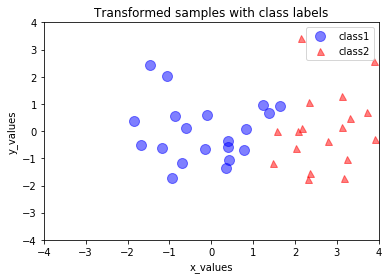

In [102]:
transformed = matrix_w.T.dot(all_samples)
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=10, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [103]:
transformed

array([[ 0.40687079,  1.24830819, -1.05748255, -0.09432855, -0.85781254,
        -0.15188059, -0.59386147,  1.37145123,  0.77616793, -1.45637341,
         0.35757025, -1.84978182,  0.43086526, -1.67090703, -1.16905615,
         0.40323073, -0.94038105, -0.68864615,  0.83732989,  1.64416874,
         5.07989843,  2.07354634,  3.12259838,  3.88245533,  2.7834789 ,
         1.47631821,  2.14148449,  2.03579608,  3.24712671,  3.11275249,
         2.31073757,  3.30720322,  2.35232538,  1.57211969,  3.17185647,
         2.16036426,  2.32389597,  3.91835499,  3.7267409 ,  4.56537189],
       [-0.59520986,  0.95661598,  2.04372253,  0.59859335,  0.55279053,
        -0.65315181,  0.11282594,  0.6839416 , -0.67594853,  2.44789261,
        -1.3580458 ,  0.36292815, -1.07336349, -0.50773705, -0.62676492,
        -0.37234414, -1.74060123, -1.16823605,  0.08015256,  0.91650596,
        -0.65785786,  0.00611307,  0.16715328,  2.57333688, -0.37053182,
        -1.1836501 ,  3.42904732, -0.61173275, -1.

In [115]:
from sklearn import decomposition
pca = decomposition.PCA()
transample = all_samples.T

In [116]:
pca.fit(transample)
pca.explained_variance_
pca.n_components = 40
x_pca = pca.fit_transform(all_samples)
x_pca

array([[  6.21999434e+00,  -3.40568396e-02,   1.52394253e-15],
       [ -3.07729728e+00,   4.87560740e+00,   1.52394253e-15],
       [ -3.14269706e+00,  -4.84155057e+00,   1.52394253e-15]])

In [117]:
transample.shape

(40, 3)

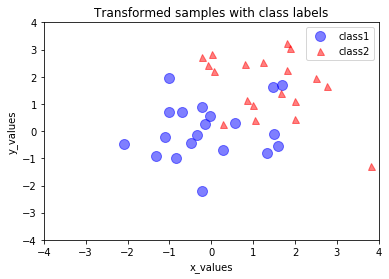

In [125]:
plt.plot(transample[0:20,0], transample[0:20,1], 'o', markersize=10, color='blue', alpha=0.5, label='class1')
plt.plot(transample[20:40,0], transample[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [119]:
transformed

array([[ -7.20248752e-01,  -8.88954168e-01,   2.60543850e-15],
       [  7.56201836e+00,  -6.01605277e-01,   2.20673191e-16]])